In [25]:
import pandas as pd
import numpy as np
import string
import random

# Function to generate a random user ID
def generate_user_id():
    letters = ''.join(random.choices(string.ascii_uppercase, k=4))
    numbers = ''.join(random.choices(string.digits, k=4))
    return letters + numbers

# Function to generate a single user's data based on conditions
def generate_user_data(start_seed, days=180, likes_zero_pct=0.1, shares_zero_pct=0.05, comments_zero_pct=0.8):

    # Initialize random seed based on starting seed and random offset
    random.seed(start_seed)
    
    


    # Generate a random user ID
    user_id = generate_user_id()

    # Generate dates
    dates = pd.date_range(start="2024-01-01", periods=days)

    # CTR (Click-Through Rate) setup with curiosity group
    ctr_group = np.random.choice(["Standard Users", "Curiosities"], p=[0.95 , 0.05])
    if ctr_group == "Standard Users":
        ctr_x = np.random.uniform(0.001, 0.02)  # Lower CTR for standard users
        ctr_y = np.random.uniform(0.025, 0.05)
    else:  # Curiosities group with higher CTR
        ctr_x = np.random.uniform(0.05, 0.1)
        ctr_y = np.random.uniform(0.1, 0.2)
    ctr_data = np.random.uniform(ctr_x, ctr_y, size=days)

    # Drop-Off Rate setup (meta-randomized groups)
    drop_off_group = np.random.choice(["Baseline", "Drifters", "Power Users"], p=[0.7, 0.2, 0.1])
    if drop_off_group == "Baseline":
        drop_x = np.random.uniform(0.01, 0.05)
        drop_y = np.random.uniform(0.05, 0.1)
        if drop_x > drop_y: drop_x, drop_y = drop_y, drop_x  # Ensure proper bounds
        drop_off_data = np.random.uniform(drop_x, drop_y, size=days)
    elif drop_off_group == "Drifters":
        drop_mean = np.random.uniform(0.05, 0.15)
        drop_std = np.random.uniform(0.01, 0.05)
        drop_off_data = np.random.normal(drop_mean, drop_std, size=days)
        drop_off_data = np.clip(drop_off_data, 0, 1)  # Keep within realistic range
    else:  # Power Users
        drop_off_data = np.random.uniform(0.01, 0.05, size=days)  # Very low drop-off rate

    # Engagement Time setup
    if drop_off_group == "Power Users":
        engagement_x = np.random.uniform(90, 120)  # High engagement
        engagement_y = np.random.uniform(130, 210)
        engagement_data = np.random.uniform(engagement_x, engagement_y, size=days)
    elif drop_off_group == "Drifters":
        engagement_mean = np.random.uniform(130, 150)
        engagement_std = np.random.uniform(20, 70)
        engagement_data = np.random.normal(engagement_mean, engagement_std, size=days)
        engagement_data = np.clip(engagement_data, 30, 200)  # Keep within reasonable bounds
    else:  # Baseline Users
        engagement_mean = np.random.uniform(40, 80)
        engagement_std = np.random.uniform(10, 30)
        engagement_data = np.random.normal(engagement_mean, engagement_std, size=days)
        engagement_data = np.clip(engagement_data, 15, 200)

    # Add cyclical pattern to engagement time (random period)
    period = np.random.uniform(20, 45)  # Random period for cyclical pattern
    engagement_data += 10 * np.sin(np.linspace(0, 2 * np.pi, days) / period)

    # Likes Given setup
    likes_group = np.random.choice(["Baseline", "Power Users", "Drifters"], p=[0.75, 0.05, 0.2])
    if likes_group == "Baseline":
        likes_data = np.random.uniform(0.02, 0.05, size=days) + np.random.uniform(-0.01, 0.01, size=days)
    elif likes_group == "Power Users":
        likes_x = 0.25
        likes_y = np.random.uniform(0.3, 0.5)
        likes_data = np.random.uniform(likes_x, likes_y, size=days)
    else:  # Drifters with cyclical pattern
        likes_mean = np.random.uniform(0.1, 0.2)
        likes_std = np.random.uniform(0.02, 0.05)
        likes_data = np.random.normal(likes_mean, likes_std, size=days)
        likes_data += 0.05 * np.sin(np.linspace(0, 2 * np.pi, days) / period)
        likes_data = np.clip(likes_data, 0, 1)  # Ensure realistic range

    # Shares setup (similar to Likes Given)
    shares_group = np.random.choice(["Baseline", "Power Users", "Drifters"], p=[0.65, 0.05, 0.30])  # Use same group split for simplicity
    if shares_group == "Baseline":
        shares_data = np.random.uniform(0.005, 0.07, size=days)
    elif shares_group == "Power Users":
        shares_data = np.random.uniform(0.05, 0.25, size=days)
    else:  # Drifters with volatility
        shares_mean = np.random.uniform(0.05, 0.09)
        shares_std = np.random.uniform(0.01, 0.03)
        shares_data = np.random.normal(shares_mean, shares_std, size=days)
        shares_data += 0.05 * np.sin(np.linspace(0, 2 * np.pi, days) / period)
        shares_data = np.clip(shares_data, 0, 1)

    # Comments Written setup (two groups)
    comments_group = np.random.choice(["Baseline", "Power Users"], p=[0.95, 0.05])

    if comments_group == "Baseline":
        # Baseline Users: Decay function skewed towards 0
        lambda_decay = np.random.uniform(2, 10)  # Randomize the steepness of decay
        comments_data = np.random.exponential(1 / lambda_decay, size=days)
        #comments_data = np.clip(comments_data, 0, 0.5)  # Keep within realistic bounds

    else:  # Power Users
        # Power Users: Normal distribution
        comments_mean = np.random.uniform(0.05, 0.08)  # Average comments
        comments_std = np.random.uniform(0.005, 0.01)  # Variability
        comments_data = np.random.normal(comments_mean, comments_std, size=days)
        comments_data = np.clip(comments_data, 0, 1)  # Ensure realistic values

    
    # Create dataframe
    user_data = pd.DataFrame({
        "User ID": user_id,
        "Date": dates,
        "CTR": ctr_data,
        "CTR Group": ctr_group,
        "Drop-Off Rate": drop_off_data,
        "Drop-Off Group": drop_off_group,
        "Engagement Time (minutes)": engagement_data,
        "Likes Given": likes_data,
        "Likes Group": likes_group,  # Add Likes Group
        "Shares": shares_data,
        "Shares Group": shares_group,  # Add Shares Group
        "Comments Written": comments_data,
        "Comments Group": comments_group  # Add Comments Group
    })

    # Randomly set rows to 0 for Likes Given, Shares, and Comments Written
    def randomly_zero_out(data_column, percentage):
        num_rows = int(len(user_data) * percentage)
        zero_indices = np.random.choice(user_data.index, num_rows, replace=False)
        user_data.loc[zero_indices, data_column] = 0

    # Apply the function based on arguments
    randomly_zero_out("Likes Given", likes_zero_pct)  # likes_zero_pct argument
    randomly_zero_out("Shares", shares_zero_pct)  # shares_zero_pct argument
    randomly_zero_out("Comments Written", comments_zero_pct)  # comments_zero_pct argument

    return user_data

# Generate data for one user and display
#user_data = generate_user_data(start_seed=12345)
#user_data


In [26]:
# Function to generate data for multiple users and union into a single dataframe
# Function to generate data for multiple users and union into a single dataframe
def generate_multiple_users_data(n_users, start_seed=12345, days=180, 
                                 likes_zero_pct=0.1, shares_zero_pct=0.05, comments_zero_pct=0.8):
    # Initialize an empty list to store dataframes
    all_users_data = []

    # Loop over the number of users
    for i in range(n_users):
        # Set unique seeds for each user
        user_seed = start_seed + i  # Unique seed for the user
        random.seed(user_seed)  # Seed for the random module
        np.random.seed(user_seed + 1000)  # Offset for numpy's seed

        # Generate data for each user
        user_data = generate_user_data(
            start_seed=user_seed,
            days=days,
            likes_zero_pct=likes_zero_pct,
            shares_zero_pct=shares_zero_pct,
            comments_zero_pct=comments_zero_pct
        )
        # Append the user's data to the list
        all_users_data.append(user_data)

    # Concatenate all user dataframes into a single dataframe
    combined_data = pd.concat(all_users_data, ignore_index=True)

    return combined_data




In [27]:
# Example usage: Generate data for 10 users
combined_users_data = generate_multiple_users_data(
    n_users=100, 
    start_seed=1003, 
    days=180, 
    likes_zero_pct=0.1, 
    shares_zero_pct=0.05, 
    comments_zero_pct=0.02
)

# Display a preview of the combined dataframe
combined_users_data

,User ID,Date,CTR,CTR Group,Drop-Off Rate,Drop-Off Group,Engagement Time (minutes),Likes Given,Likes Group,Shares,Shares Group,Comments Written,Comments Group
0,MJSL4034,2024-01-01,0.018355,Standard Users,0.062796,Baseline,36.638758,0.212188,Drifters,0.053528,Baseline,0.933709,Baseline
1,MJSL4034,2024-01-02,0.031204,Standard Users,0.095314,Baseline,49.798897,0.198621,Drifters,0.048968,Baseline,0.237031,Baseline
2,MJSL4034,2024-01-03,0.014300,Standard Users,0.032764,Baseline,29.179804,0.181946,Drifters,0.067430,Baseline,0.418076,Baseline
3,MJSL4034,2024-01-04,0.034452,Standard Users,0.085028,Baseline,72.234521,0.000000,Drifters,0.047306,Baseline,0.199887,Baseline
4,MJSL4034,2024-01-05,0.030966,Standard Users,0.058925,Baseline,51.142469,0.156249,Drifters,0.014614,Baseline,0.001716,Baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,SDRX7417,2024-06-24,0.034586,Standard Users,0.042711,Baseline,69.270289,0.206556,Drifters,0.063671,Baseline,0.054126,Baseline
17996,SDRX7417,2024-06-25,0.040271,Standard Users,0.038525,Baseline,64.076552,0.180755,Drifters,0.069271,Baseline,0.290552,Baseline
17997,SDRX7417,2024-06-26,0.037455,Standard Users,0.048959,Baseline,52.235958,0.000000,Drifters,0.023650,Baseline,0.413436,Baseline
17998,SDRX7417,2024-06-27,0.028584,Standard Users,0.040810,Baseline,56.997908,0.209819,Drifters,0.018431,Baseline,0.354012,Baseline


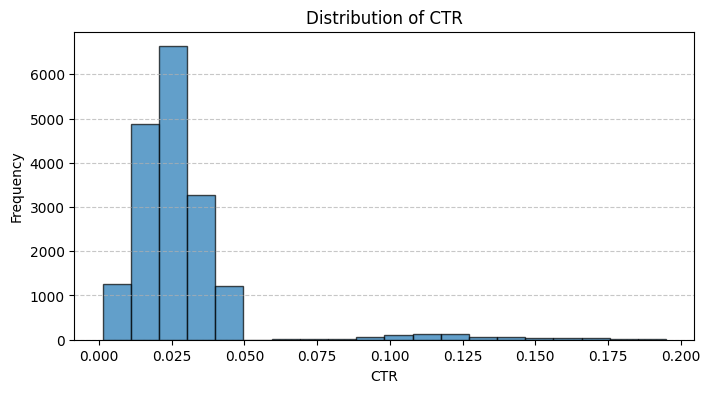

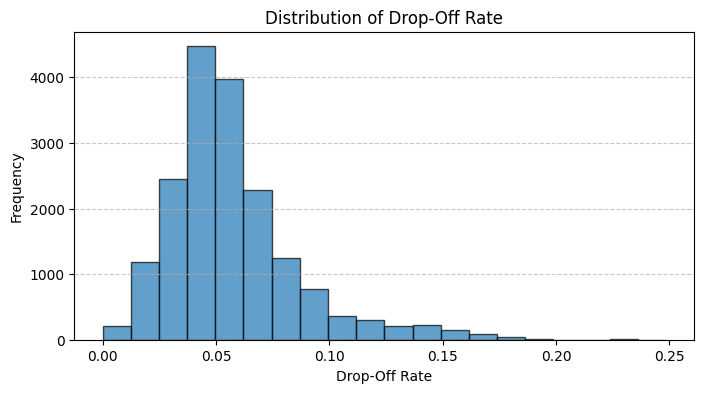

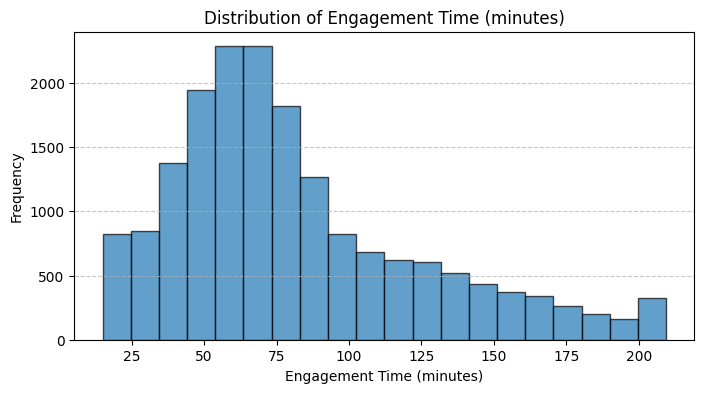

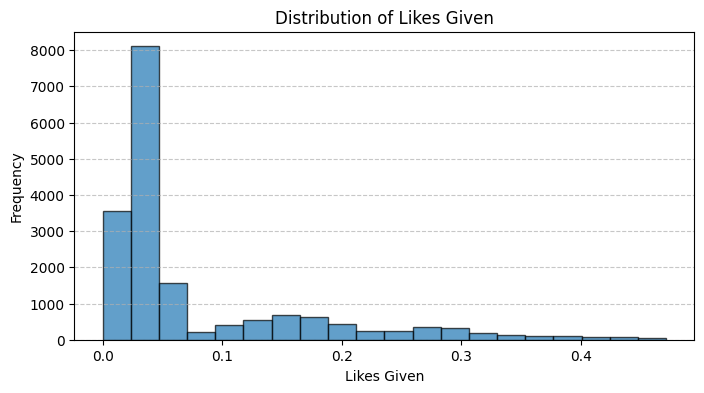

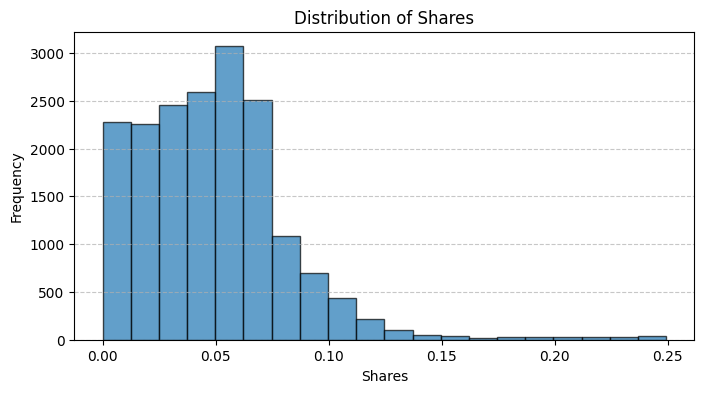

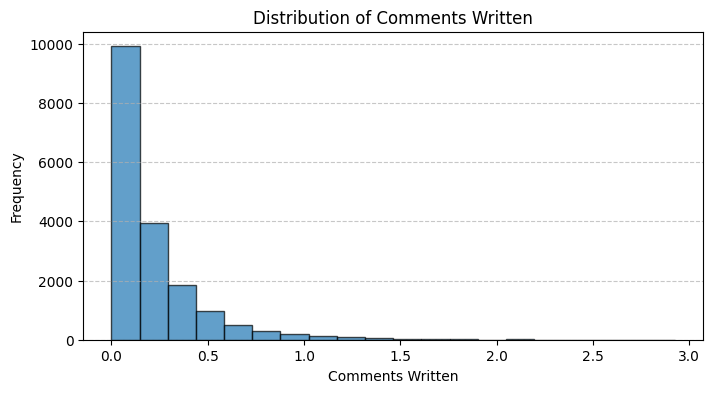

In [28]:
# Quick sanity check: Distribution of values for each column
import matplotlib.pyplot as plt

# Columns to analyze
columns_to_check = [
    "CTR", 
    "Drop-Off Rate", 
    "Engagement Time (minutes)", 
    "Likes Given", 
    "Shares", 
    "Comments Written"
]

# Simple EDA: Plot histograms for each column
for column in columns_to_check:
    plt.figure(figsize=(8, 4))
    plt.hist(combined_users_data[column], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
